# Case Study #06 -Data Preprocessing

## Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [715]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Load the dataset into python environment

In [685]:
data1 = pd.read_csv('titanic_dataset.csv')
data = pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make 'PassengerId' as the index column 

In [686]:
data.set_index('PassengerId',inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3. Check the basic details of the dataset

In [687]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [688]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [689]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [690]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [691]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [692]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [694]:
data['median_age'] = data['Age'].fillna(data['Age'].median())
random_age_values = data['Age'].dropna().sample(data['Age'].isnull().sum())
random_age_values.index = data[data['Age'].isnull()].index
data['random_age'] = data['Age'].fillna(random_age_values)
data['Age'].fillna(random_age_values, inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['Cabin'],axis = 1,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,median_age,random_age
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,27.0,27.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,19.0,19.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,50.0,1,2,W./C. 6607,23.4500,S,28.0,50.0


In [695]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
median_age    0
random_age    0
dtype: int64

In [697]:
data.drop(columns=['median_age', 'random_age'], inplace=True)

### 5. Check and handle outliers in at least 3 columns in the dataset

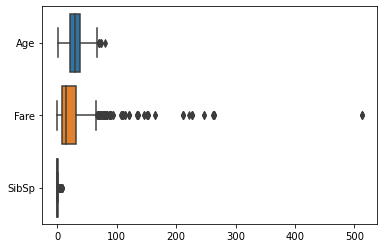

In [698]:
sns.boxplot(data=data[['Age', 'Fare','SibSp']], orient='h')
plt.show()

In [699]:
# Finding IQR (Q3-Q1)
# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.
# Q1, Q2, Q3 of Age
age = []
age[3:1]= np.percentile(data['Age'], [25,50,75] ,interpolation='midpoint')

# Q1, Q2, Q3 of Fare
fare = []
fare[3:1]= np.percentile(data['Fare'], [25,50,75] ,interpolation='midpoint')

# Q1, Q2, Q3 of SibSp
SibSp = []
SibSp[3:1] = np.percentile(data['SibSp'], [25,50,75] ,interpolation='midpoint')


In [700]:
print('AGE')
print('',age)
print('Fare')
print('',fare)
print('SibSp')
print('',SibSp)

AGE
 [21.0, 29.0, 39.0]
Fare
 [7.9104, 14.4542, 31.0]
SibSp
 [0.0, 0.0, 1.0]


In [701]:
for i in range(0,3):
    if data['Age'].median() == age[i]:
        print('Q',i+1,'of age = median')
    if data['Fare'].median() == fare[i]:
        print('Q',i+1,'of fare = median')
    if data['SibSp'].median() == SibSp[i]:
        print('Q',i+1,'of SibSp = median')

Q 1 of SibSp = median
Q 2 of age = median
Q 2 of fare = median
Q 2 of SibSp = median


In [702]:
# Finding the upper limit and lower limit
# Age
def outlier_index(value):
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    index = value.loc[(value < lower_limit)^(value > upper_limit)].index.tolist()
    return index

In [703]:
age_index = outlier_index(data['Age'])
fare_index = outlier_index(data['Fare'])
SibSp_index = outlier_index(data['SibSp'])

In [704]:
print(age_index)
print(fare_index)
print(SibSp_index)
index = len(age_index)+len(fare_index)+len(SibSp_index)
index

[97, 117, 494, 602, 631, 673, 746, 852]
[2, 28, 32, 35, 53, 62, 63, 73, 89, 103, 119, 121, 125, 140, 152, 160, 181, 196, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588, 592, 610, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746, 760, 764, 766, 780, 790, 793, 803, 821, 830, 836, 847, 850, 857, 864, 880]
[8, 17, 25, 28, 51, 60, 64, 69, 72, 86, 89, 120, 160, 165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820, 825, 847, 851, 864]


170

In [705]:
index_to_remove = []
for each in fare_index:
    if (each in age_index) or (each in SibSp_index):
        continue
    else:
        index_to_remove.append(each)
len(index_to_remove)

105

In [706]:
data.drop(index=index_to_remove, inplace=True)
data.shape

(786, 10)

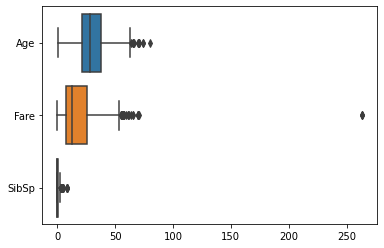

In [707]:
sns.boxplot(data=data[['Age', 'Fare','SibSp']], orient='h')
plt.show()

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

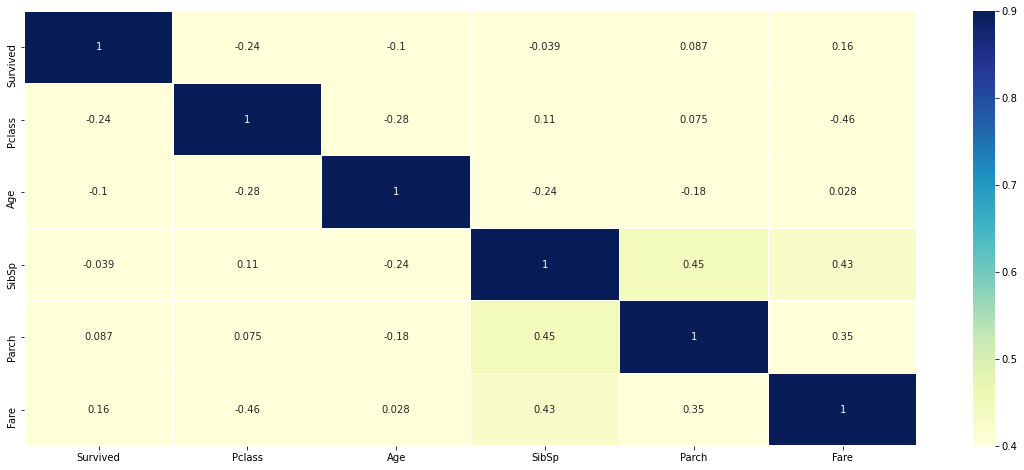

In [708]:
# We are done with the pre-processing steps. Now, let's create a linear regression model.

corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [710]:
data.drop(['Name', 'Ticket','Sex','Embarked'], inplace=True, axis=1)
data1.drop(['Name', 'Ticket','Sex','Embarked'], inplace=True, axis=1)
y = data['Survived']
x = data.drop('Survived', axis=1)

In [711]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2.477099,29.576972,0.515267,0.362595,19.286222
std,0.738468,14.214946,1.152299,0.802592,20.900372
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,13.000000
75%,3.000000,38.000000,1.000000,0.000000,26.000000
max,3.000000,80.000000,8.000000,6.000000,263.000000


In [714]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.738550,0.366386,0.064408,0.060433,0.073332
std,0.369234,0.178625,0.144037,0.133765,0.079469
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.258608,0.000000,0.000000,0.030022
50%,1.000000,0.346569,0.000000,0.000000,0.049430
75%,1.000000,0.472229,0.125000,0.000000,0.098859
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [716]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)

print('MSE is : ', mean_squared_error(y_test, predictions))
print('R squared value is : ', r2_score(y_test, predictions))

MSE is :  0.2037219599675326
R squared value is :  0.1293074801182189


#### Summary
- MSE : 0.13488866167474592
- R-squared : 0.4437622125198798
- The Data set have a very low MSE value